In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/Users/suchanatratanarueangrong/KMUTT/Year 2 Semester 2/Datamodel/covertype/covertype.csv")

In [5]:
df.head(50)

index  elevation  aspect  slope  horizontal_distance_to_hydrology  \
0       0       2596      51      3                               258   
1       1       2590      56      2                               212   
2       2       2804     139      9                               268   
3       3       2785     155     18                               242   
4       4       2595      45      2                               153   
5       5       2579     132      6                               300   
6       6       2606      45      7                               270   
7       7       2605      49      4                               234   
8       8       2617      45      9                               240   
9       9       2612      59     10                               247   
10     10       2612     201      4                               180   
11     11       2886     151     11                               371   
12     12       2742     134     22                               150   
13     13       2609     214      7                               150   
14     14       2503     157      4                                67   
15     15       2495      51      7                                42   
16     16       2610     259      1                               120   
17     17       2517      72      7                                85   
18     18       2504       0      4                                95   
19     19       2503      38      5                                85   
20     20       2501      71      9                                60   
21     21       2880     209     17                               216   
22     22       2768     114     23                               192   
23     23       2511      54      8                               124   
24     24       2507      22      9                               120   
25     25       2492     135      6                                 0   
26     26       2489     163     10                                30   
27     27       2962     148     16                               323   
28     28       2811     135      1                               212   
29     29       2739     117     24                               127   
30     30       2703     122     30                                67   
31     31       2522     105      7                               120   
32     32       2519     102      6                               124   
33     33       2516      23      6                               150   
34     34       2515      41      9                               162   
35     35       2900      45     19                               242   
36     36       2709     125     28                                67   
37     37       2511      92      7                               182   
38     38       2749      98     30                               124   
39     39       2686     354     12                                 0   
40     40       2699     347      3                                 0   
41     41       2570     346      2                                 0   
42     42       2533      71      9                               150   
43     43       2703     330     27                                30   
44     44       2678     128      5                                95   
45     45       2529      68      8                               210   
46     46       2524      94      7                               212   
47     47       2536      99      6                               234   
48     48       2498      66      6                                95   
49     49       2489     100      7                                85   

    vertical_distance_to_hydrology  horizontal_distance_to_roadways  \
0                                0                              510   
1                               -6                              390   
2                               65                             3180

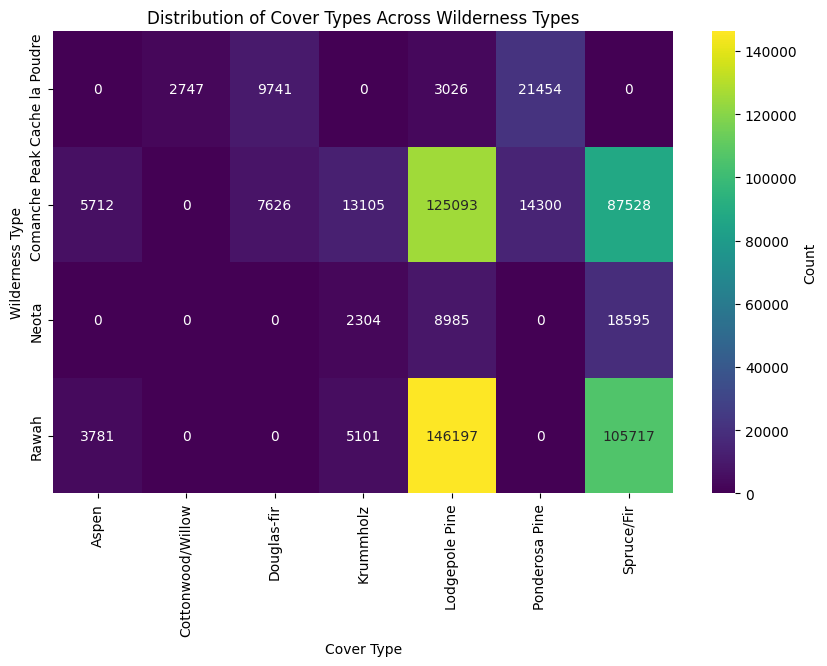

In [12]:
cross_tab = pd.crosstab(df['wilderness_type'], df['cover_type'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='viridis', fmt='d', cbar_kws={'label': 'Count'})
plt.title("Distribution of Cover Types Across Wilderness Types")
plt.xlabel("Cover Type")
plt.ylabel("Wilderness Type")
plt.show()

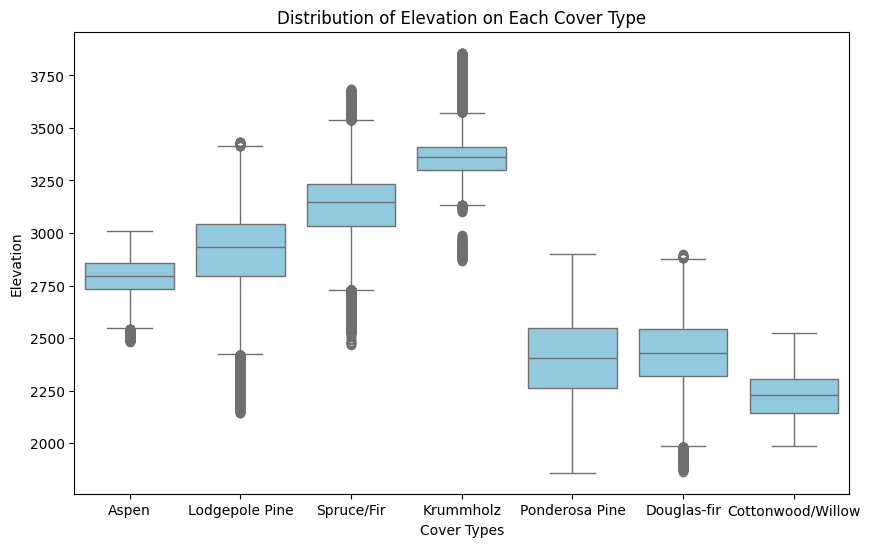

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cover_type', y='elevation', data=df, color='skyblue')
plt.title('Distribution of Elevation on Each Cover Type')
plt.ylabel('Elevation')
plt.xlabel('Cover Types')
plt.show()

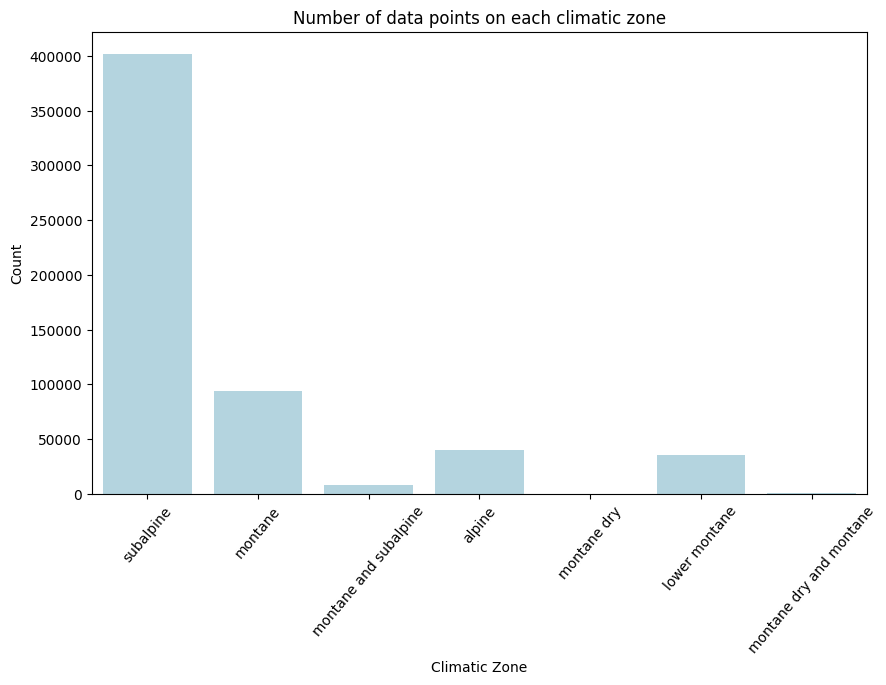

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['climatic_zone'], color='lightblue')
plt.title("Number of data points on each climatic zone")
plt.ylabel("Count")
plt.xlabel("Climatic Zone")
plt.xticks(rotation=50)
plt.show()

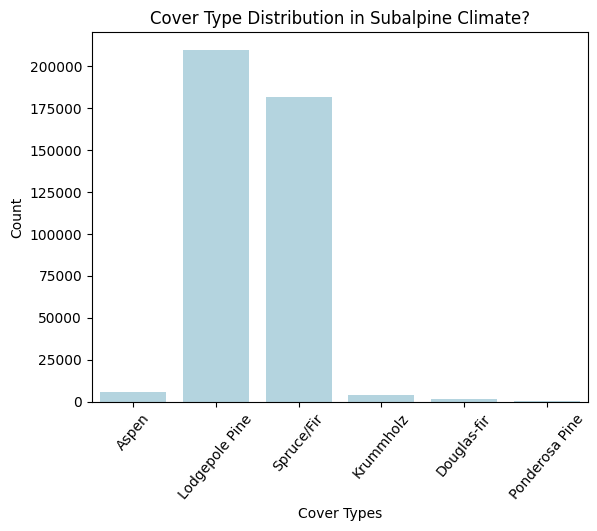

In [28]:
subalpine = df[df['climatic_zone']=='subalpine']
sns.countplot(x=subalpine['cover_type'], color='lightblue')
plt.title("Cover Type Distribution in Subalpine Climate?")
plt.ylabel("Count")
plt.xlabel("Cover Types")
plt.xticks(rotation=50)
plt.show()

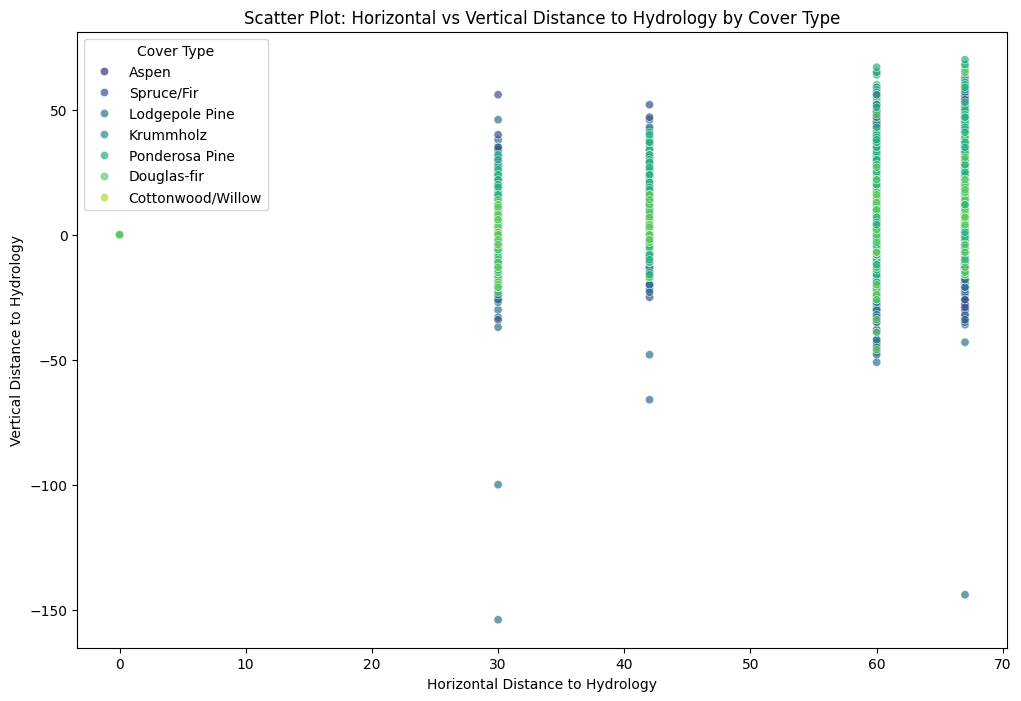

In [84]:
filter_df = df[(df['horizontal_distance_to_hydrology']<=70) & (df['vertical_distance_to_hydrology'] <= 70)][['horizontal_distance_to_hydrology','vertical_distance_to_hydrology','cover_type']]
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='horizontal_distance_to_hydrology',
    y='vertical_distance_to_hydrology',
    hue='cover_type',
    data=filter_df,
    palette='viridis',
    alpha=0.7,
)
plt.title('Scatter Plot: Horizontal vs Vertical Distance to Hydrology by Cover Type')
plt.xlabel('Horizontal Distance to Hydrology')
plt.ylabel('Vertical Distance to Hydrology')
plt.legend(title='Cover Type')
plt.show()

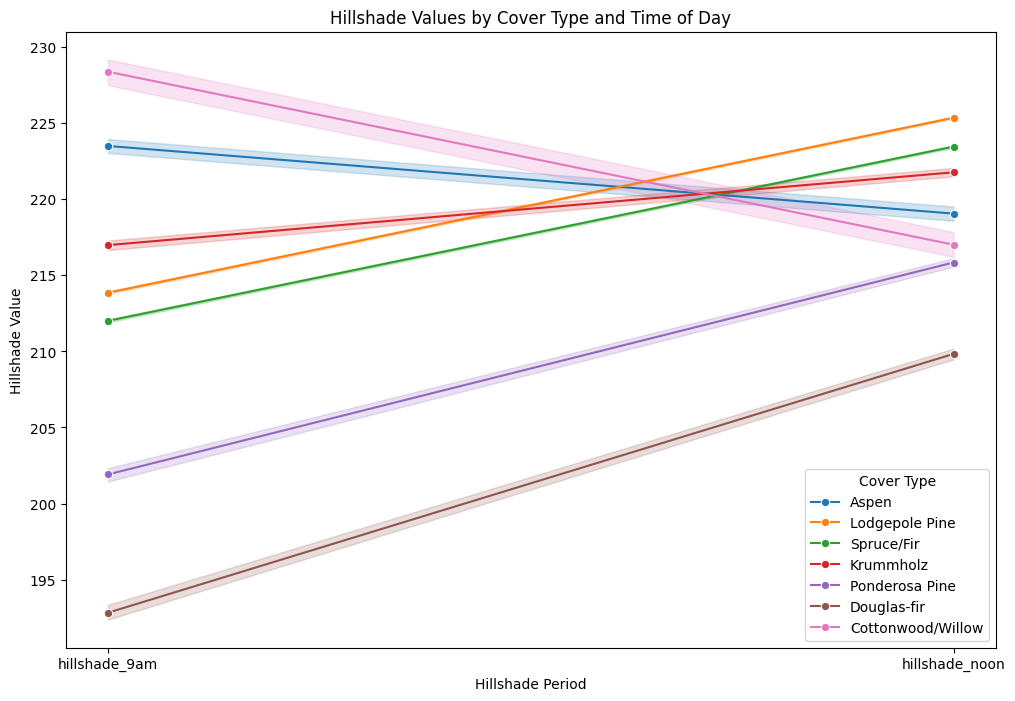

In [85]:
shade_columns = ['hillshade_9am', 'hillshade_noon', 'cover_type']
shade_df = df[shade_columns]

melted_df = pd.melt(shade_df, id_vars='cover_type', var_name='Hillshade Period', value_name='Hillshade Value')

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(x='Hillshade Period', y='Hillshade Value', hue='cover_type', data=melted_df, marker='o')
plt.title('Hillshade Values by Cover Type and Time of Day')
plt.xlabel('Hillshade Period')
plt.ylabel('Hillshade Value')
plt.legend(title='Cover Type')
plt.show()

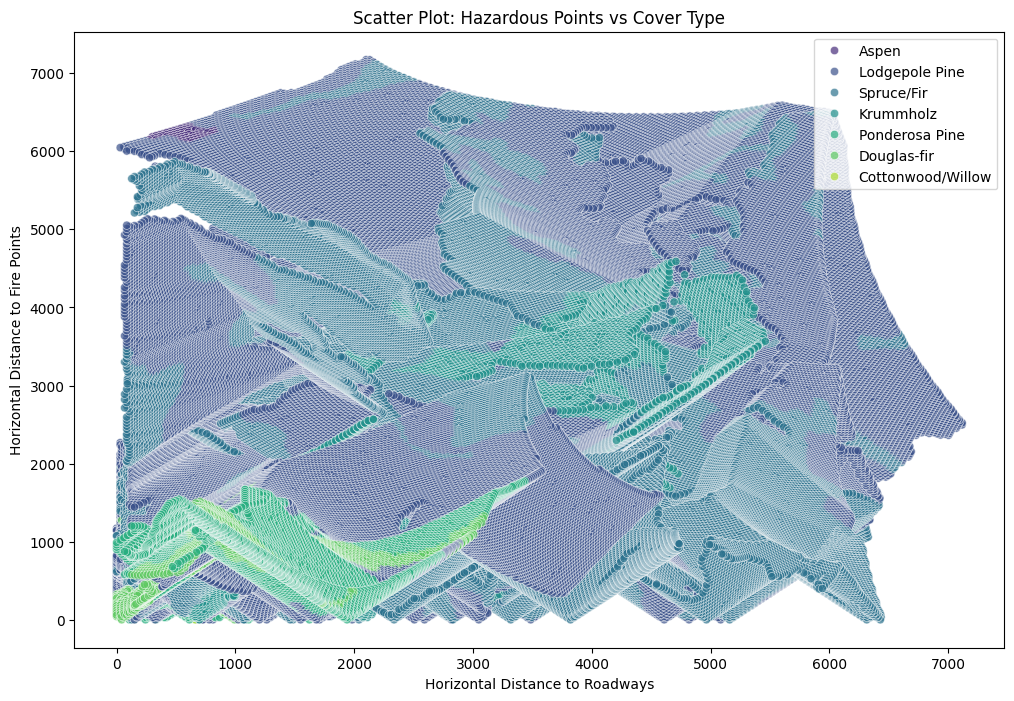

In [82]:
filter_data3 = df[
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='horizontal_distance_to_roadways',
    y='horizontal_distance_to_fire_points',
    hue='cover_type',
    data=df,
    palette='viridis', 
    alpha=0.7
)
plt.title('Scatter Plot: Hazardous Points vs Cover Type')
plt.xlabel('Horizontal Distance to Roadways')
plt.ylabel('Horizontal Distance to Fire Points')
plt.legend()
plt.show()

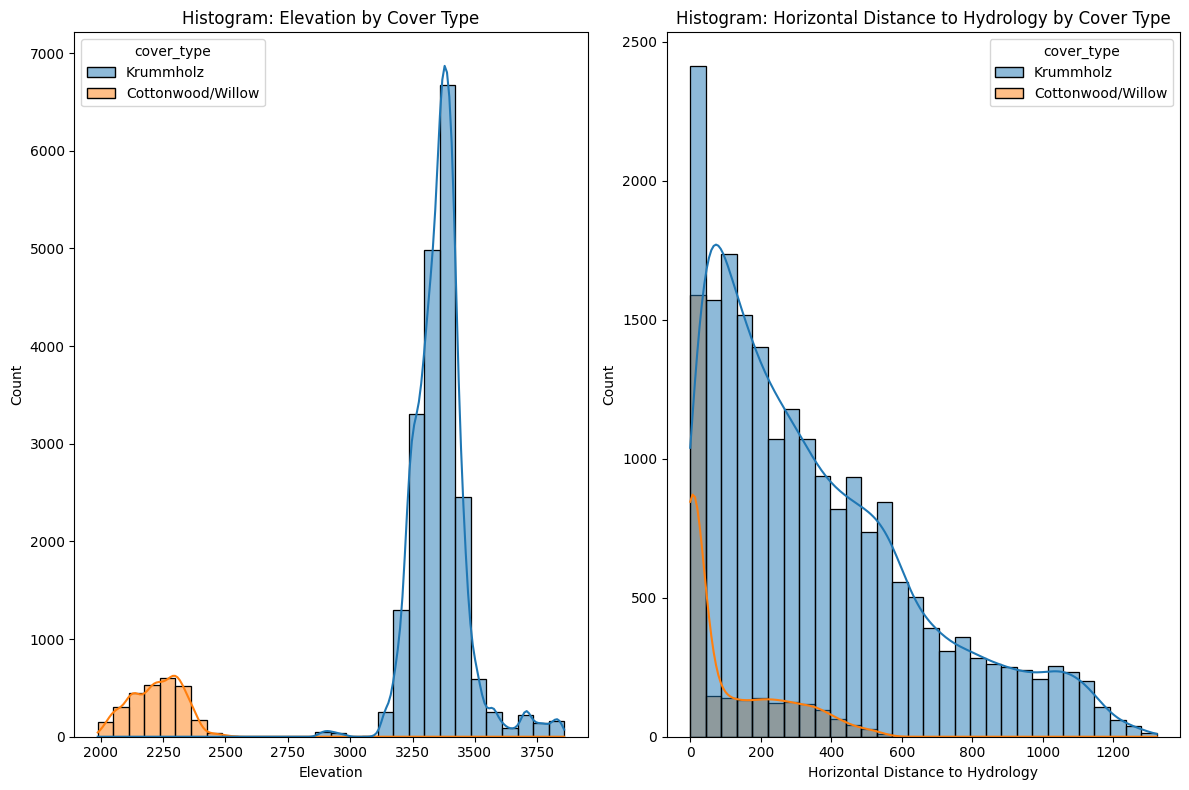

In [88]:
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
sns.histplot(data=df[df['cover_type'].isin(['Krummholz', 'Cottonwood/Willow'])],x='elevation', hue='cover_type', bins=30, kde=True)
plt.title('Histogram: Elevation by Cover Type')
plt.xlabel('Elevation')

plt.subplot(1, 2, 2)
sns.histplot(data=df[df['cover_type'].isin(['Krummholz', 'Cottonwood/Willow'])],x='horizontal_distance_to_hydrology', hue='cover_type', bins=30, kde=True)
plt.title('Histogram: Horizontal Distance to Hydrology by Cover Type')
plt.xlabel('Horizontal Distance to Hydrology')

plt.tight_layout()
plt.show()

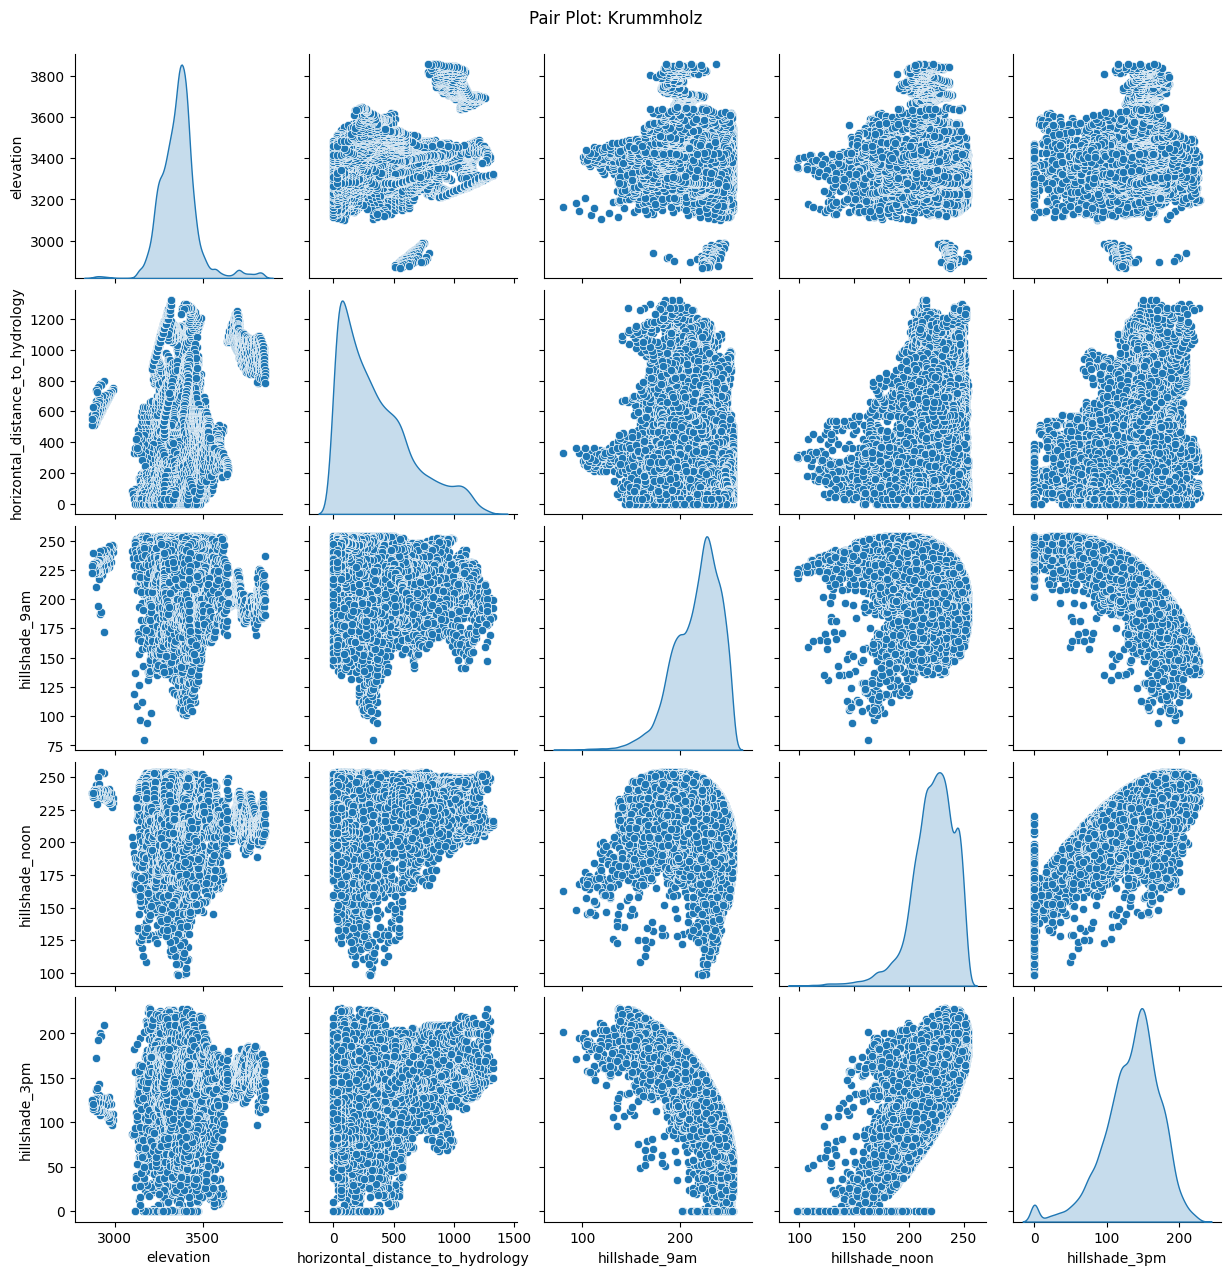

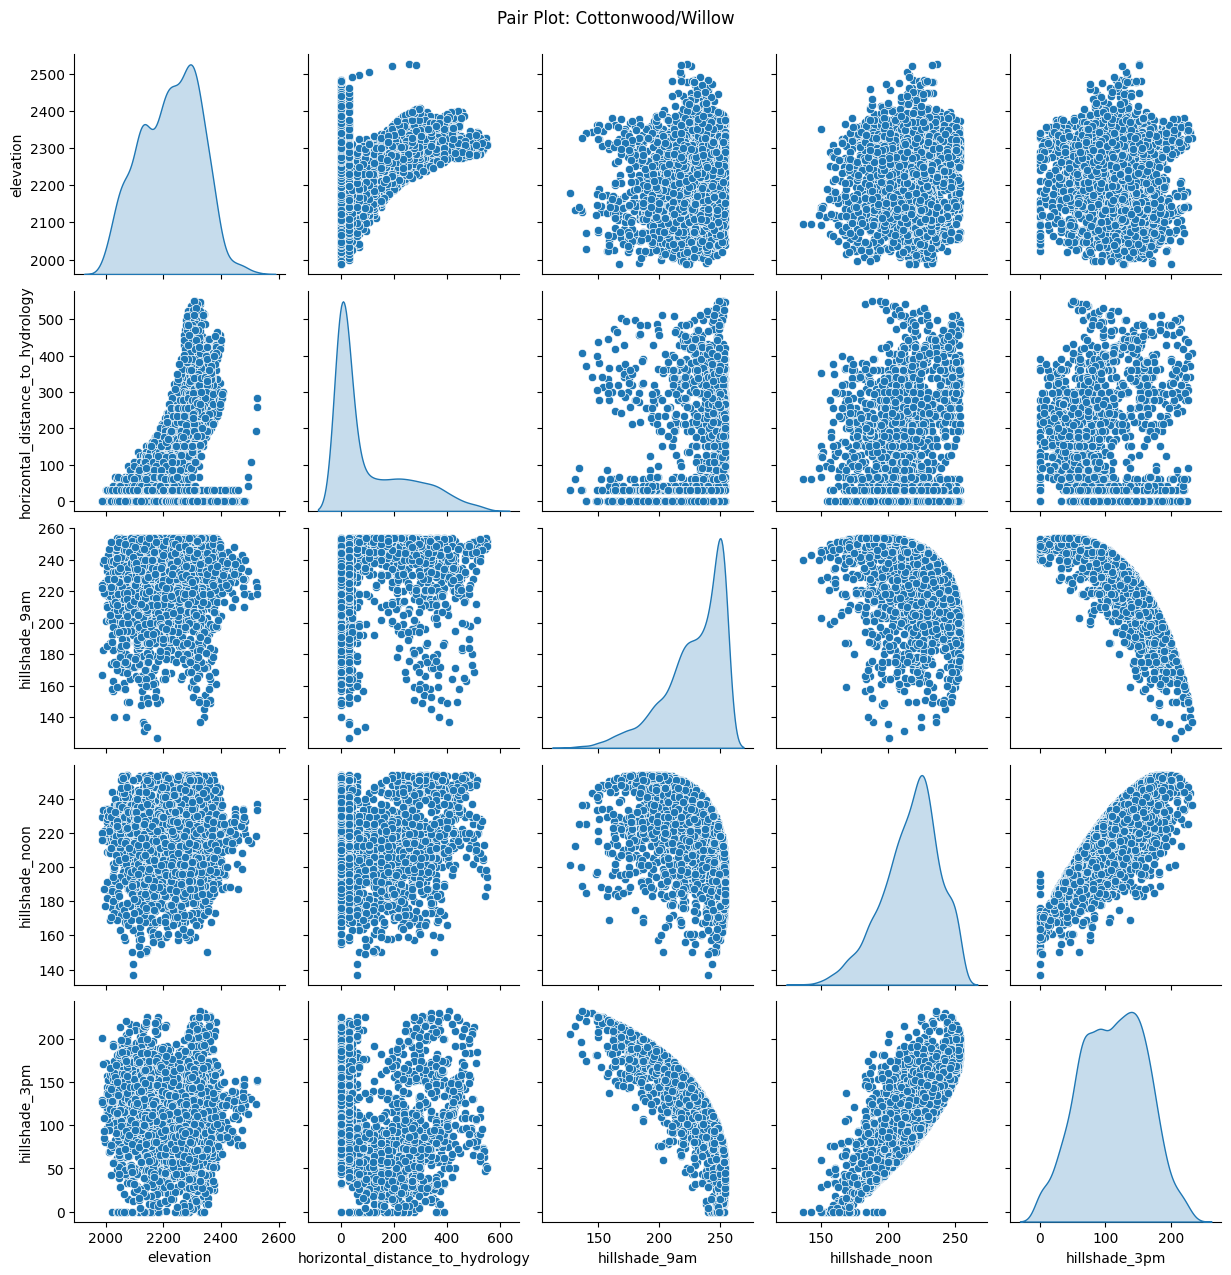

In [104]:
krummholz_df = df[df['cover_type'] == 'Krummholz']
cottonwood_willow_df = df[df['cover_type'] == 'Cottonwood/Willow']
features = ['elevation', 'horizontal_distance_to_hydrology', 'hillshade_9am', 'hillshade_noon', 'hillshade_3pm']

sns.pairplot(krummholz_df[features], diag_kind='kde')
plt.suptitle('Pair Plot: Krummholz', y=1.02)
plt.show()

sns.pairplot(cottonwood_willow_df[features], diag_kind='kde')
plt.suptitle('Pair Plot: Cottonwood/Willow', y=1.02)
plt.show()

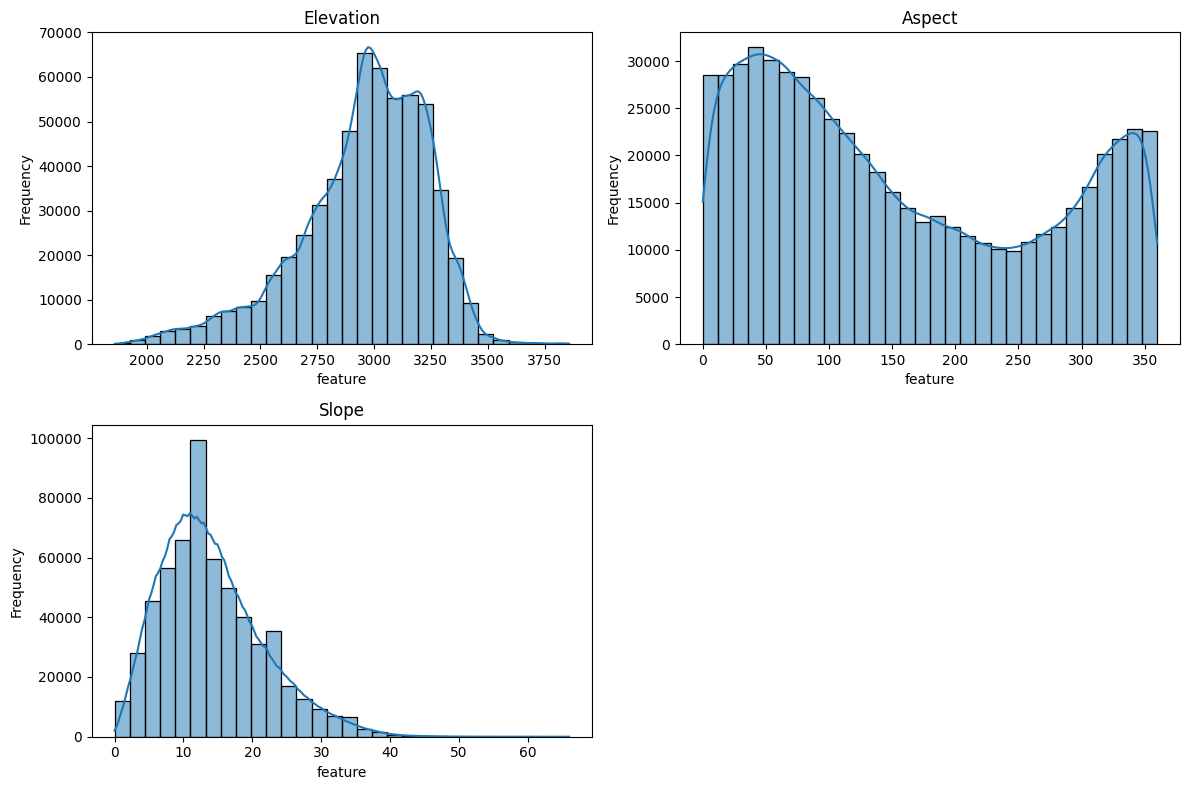

In [8]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['elevation'], kde=True, bins=30)
plt.title("Elevation")
plt.xlabel('feature')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.histplot(df['aspect'], kde=True, bins=30)
plt.title("Aspect")
plt.xlabel('feature')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
sns.histplot(df['slope'], kde=True, bins=30)
plt.title("Slope")
plt.xlabel('feature')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

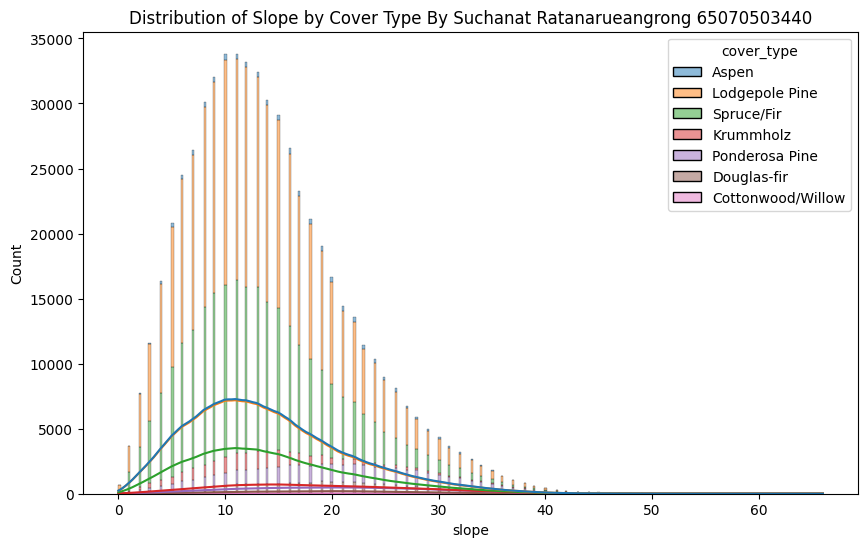

In [108]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='slope', hue='cover_type', multiple='stack', kde=True)
plt.title('Distribution of Slope by Cover Type By Suchanat Ratanarueangrong 65070503440')
plt.show()

/var/folders/rg/45gtrwls705094nr5_p2f7980000gn/T/ipykernel_99580/1795153932.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x="horizontal_distance_to_roadways",y="wilderness_type",data=df,palette="Spectral")


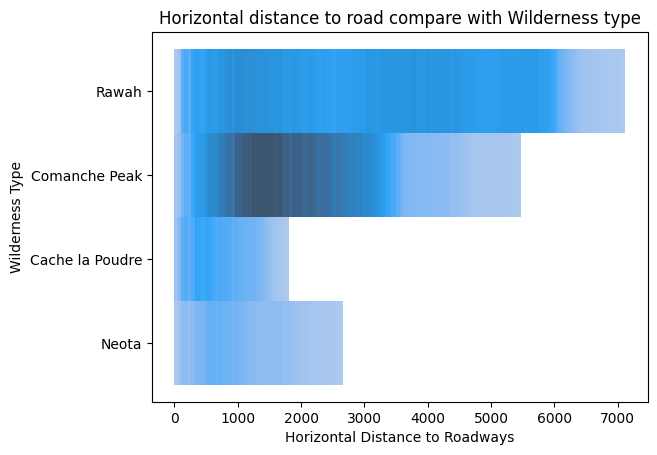

In [9]:
sns.histplot(x="horizontal_distance_to_roadways",y="wilderness_type",data=df,palette="Spectral")
plt.title("Horizontal distance to road compare with Wilderness type")
plt.xlabel("Horizontal Distance to Roadways")
plt.ylabel("Wilderness Type")
plt.show()
#phakhapol maneesopa 65070503459

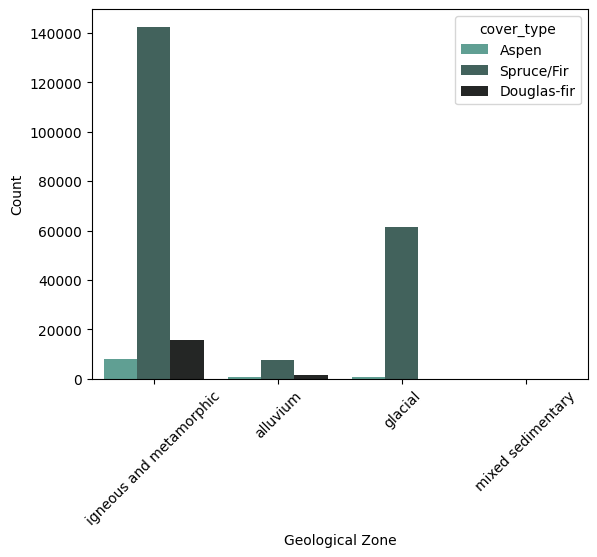

In [10]:
#Question 11 (Parit Leelasetawong 65070503422)
igni = df[(df['cover_type'] == 'Spruce/Fir') | (df['cover_type'] == 'Aspen')| (df['cover_type'] == 'Douglas-fir')]
custom_palette = sns.color_palette("dark:#5A9_r", len(igni['cover_type'].unique()))  
sns.countplot(data=igni, x='geologic_zone', hue='cover_type', palette=custom_palette)
plt.xlabel('Geological Zone')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()